# 2D IR Spectra

In [1]:
import os
from Irspec2d import *
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Load data

In [2]:
mol = 'DAR' # used to name the plots
basis = 'def2-TZVP'
func = 'b3-lyp'
cosmo = True
deut = True

usenewminmax = True
newmin = 1981
newmax = 2209
steps = 1000

saveplot = False
invertaxis = True


datafolder = '/home/julia/testsystems'
if cosmo and deut:
    path = os.path.join(datafolder,mol,basis,func+'_cosmo_deut')
elif cosmo:
    path = os.path.join(datafolder,mol,basis,func+'_cosmo')
elif deut:
    path = os.path.join(datafolder,mol,basis,func+'_deut')
else:
    path = os.path.join(datafolder,mol,basis,func)

print('Found path:',path)
freqmat = np.load(os.path.join(path,'results_VCI_exciton','VCI_frequencies.npy'))
transmat = np.load(os.path.join(path,'results_VCI_exciton','VCI_dipolemoments.npy'))

harm = None
freqharmfile = os.path.join(path,'results_VCI_exciton','VCI_frequencies_harm.npy')
transharmfile = os.path.join(path,'results_VCI_exciton','VCI_dipolemoments_harm.npy')
if os.path.isfile(freqharmfile) and os.path.isfile(transharmfile):
    print('Found harmonic data')
    harm = True                 
    
    freqmath = np.load(freqharmfile)
    transmath = np.load(transharmfile)

Found path: /home/julia/testsystems/DAR/def2-TZVP/b3-lyp_cosmo_deut
Found harmonic data


### Calculate peaks

In [3]:
print(freqmat[0])
# 0 2067 2128 4123 4173 4247 

[   0.         2066.67865944 2127.71703512 4122.52821832 4173.21814693
 4247.27274221]


In [4]:
anharmcalc = calc_2dirsimple(freqmat,transmat, verbose_all=True)
exc, emi, ble = anharmcalc.calc_all_2d_process()

#harm = None
if harm:
    print()
    harmcalc = calc_2dirsimple(freqmath,transmath, verbose_all=True)
    exch, emih, bleh = harmcalc.calc_all_2d_process()

Excitation from energy level 1 to 2 at ( 2066.678659436857 , 61.038375680804165 ) rcm and intensity:  0.7005105223917634
Excitation from energy level 1 to 3 at ( 2066.678659436857 , 2055.8495588810392 ) rcm and intensity:  1646.2718526054878
Excitation from energy level 1 to 4 at ( 2066.678659436857 , 2106.539487493428 ) rcm and intensity:  712.9890302300595
Excitation from energy level 1 to 5 at ( 2066.678659436857 , 2180.5940827752347 ) rcm and intensity:  14.205367049907744
Excitation from energy level 2 to 3 at ( 2127.717035117661 , 1994.811183200235 ) rcm and intensity:  11.065803226375518
Excitation from energy level 2 to 4 at ( 2127.717035117661 , 2045.501111812624 ) rcm and intensity:  832.1145016977686
Excitation from energy level 2 to 5 at ( 2127.717035117661 , 2119.5557070944305 ) rcm and intensity:  1431.5433276834847
Stimulated emission from energy level 1 to 0 at ( 2066.678659436857 , 2066.678659436857 ) rcm and intensity:  854.972110331956
Stimulated emission from energy

### Plot position of peaks

In [5]:
specoffset = 100

ifreqs = anharmcalc.set_initial_freqs()
print('Frequency CO modes:',ifreqs)

xmin = ifreqs.min() - specoffset
xmax = ifreqs.max() + specoffset
#print(xmin,xmax)


if harm:
    ifreqsh = harmcalc.set_initial_freqs()
    print('Frequency harm. CO modes:',ifreqsh)
    
    xminh = ifreqsh.min() - specoffset
    xmaxh = ifreqsh.max() + specoffset
    #print(xminh,xmaxh)
    
    if usenewminmax:
        usingmin = newmin
        usingmax = newmax
    else: 
        if xmin > xminh: usingmin = xminh
        else: usingmin = xmin
        if xmax > xmaxh: usingmax = xmax
        else: usingmax = xmaxh
else:
    if usenewminmax:
        usingmin = newmin
        usingmax = newmax
    else: 
        usingmin = xmin
        usingmax = xmax
        
print('Using min:',usingmin,'max:',usingmax)

Frequency CO modes: [2066.67865944 2127.71703512]
Frequency harm. CO modes: [2086.94268163 2147.68925468]
Using min: 1981 max: 2209


### Plot 2D spectrum

In [6]:
lssmall = 9
lsmedium = 12
lslarge = 18

x,y,z = spectrum().calc_lorentz_spectrum2d(exc,emi,ble,usingmin,usingmax,steps)
z_val = spectrum().find_minmax(z)

if harm:
    xh,yh,zh = spectrum().calc_lorentz_spectrum2d(exch,emih,bleh,usingmin,usingmax,steps)
    z_valh = spectrum().find_minmax(zh)

In [7]:
from matplotlib.colors import LinearSegmentedColormap

#colors = ["#b00046", "#c0336b", "#d06690", "#df99b5","#ffffff", "#ccdde3", "#99bac7", "#6698ac", "#337590", "#005374"]
colors = ["#70002d","#b00046", "#c0336b", "#ffffff", "#3399c3", "#005374", "#00364c"]
ccmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

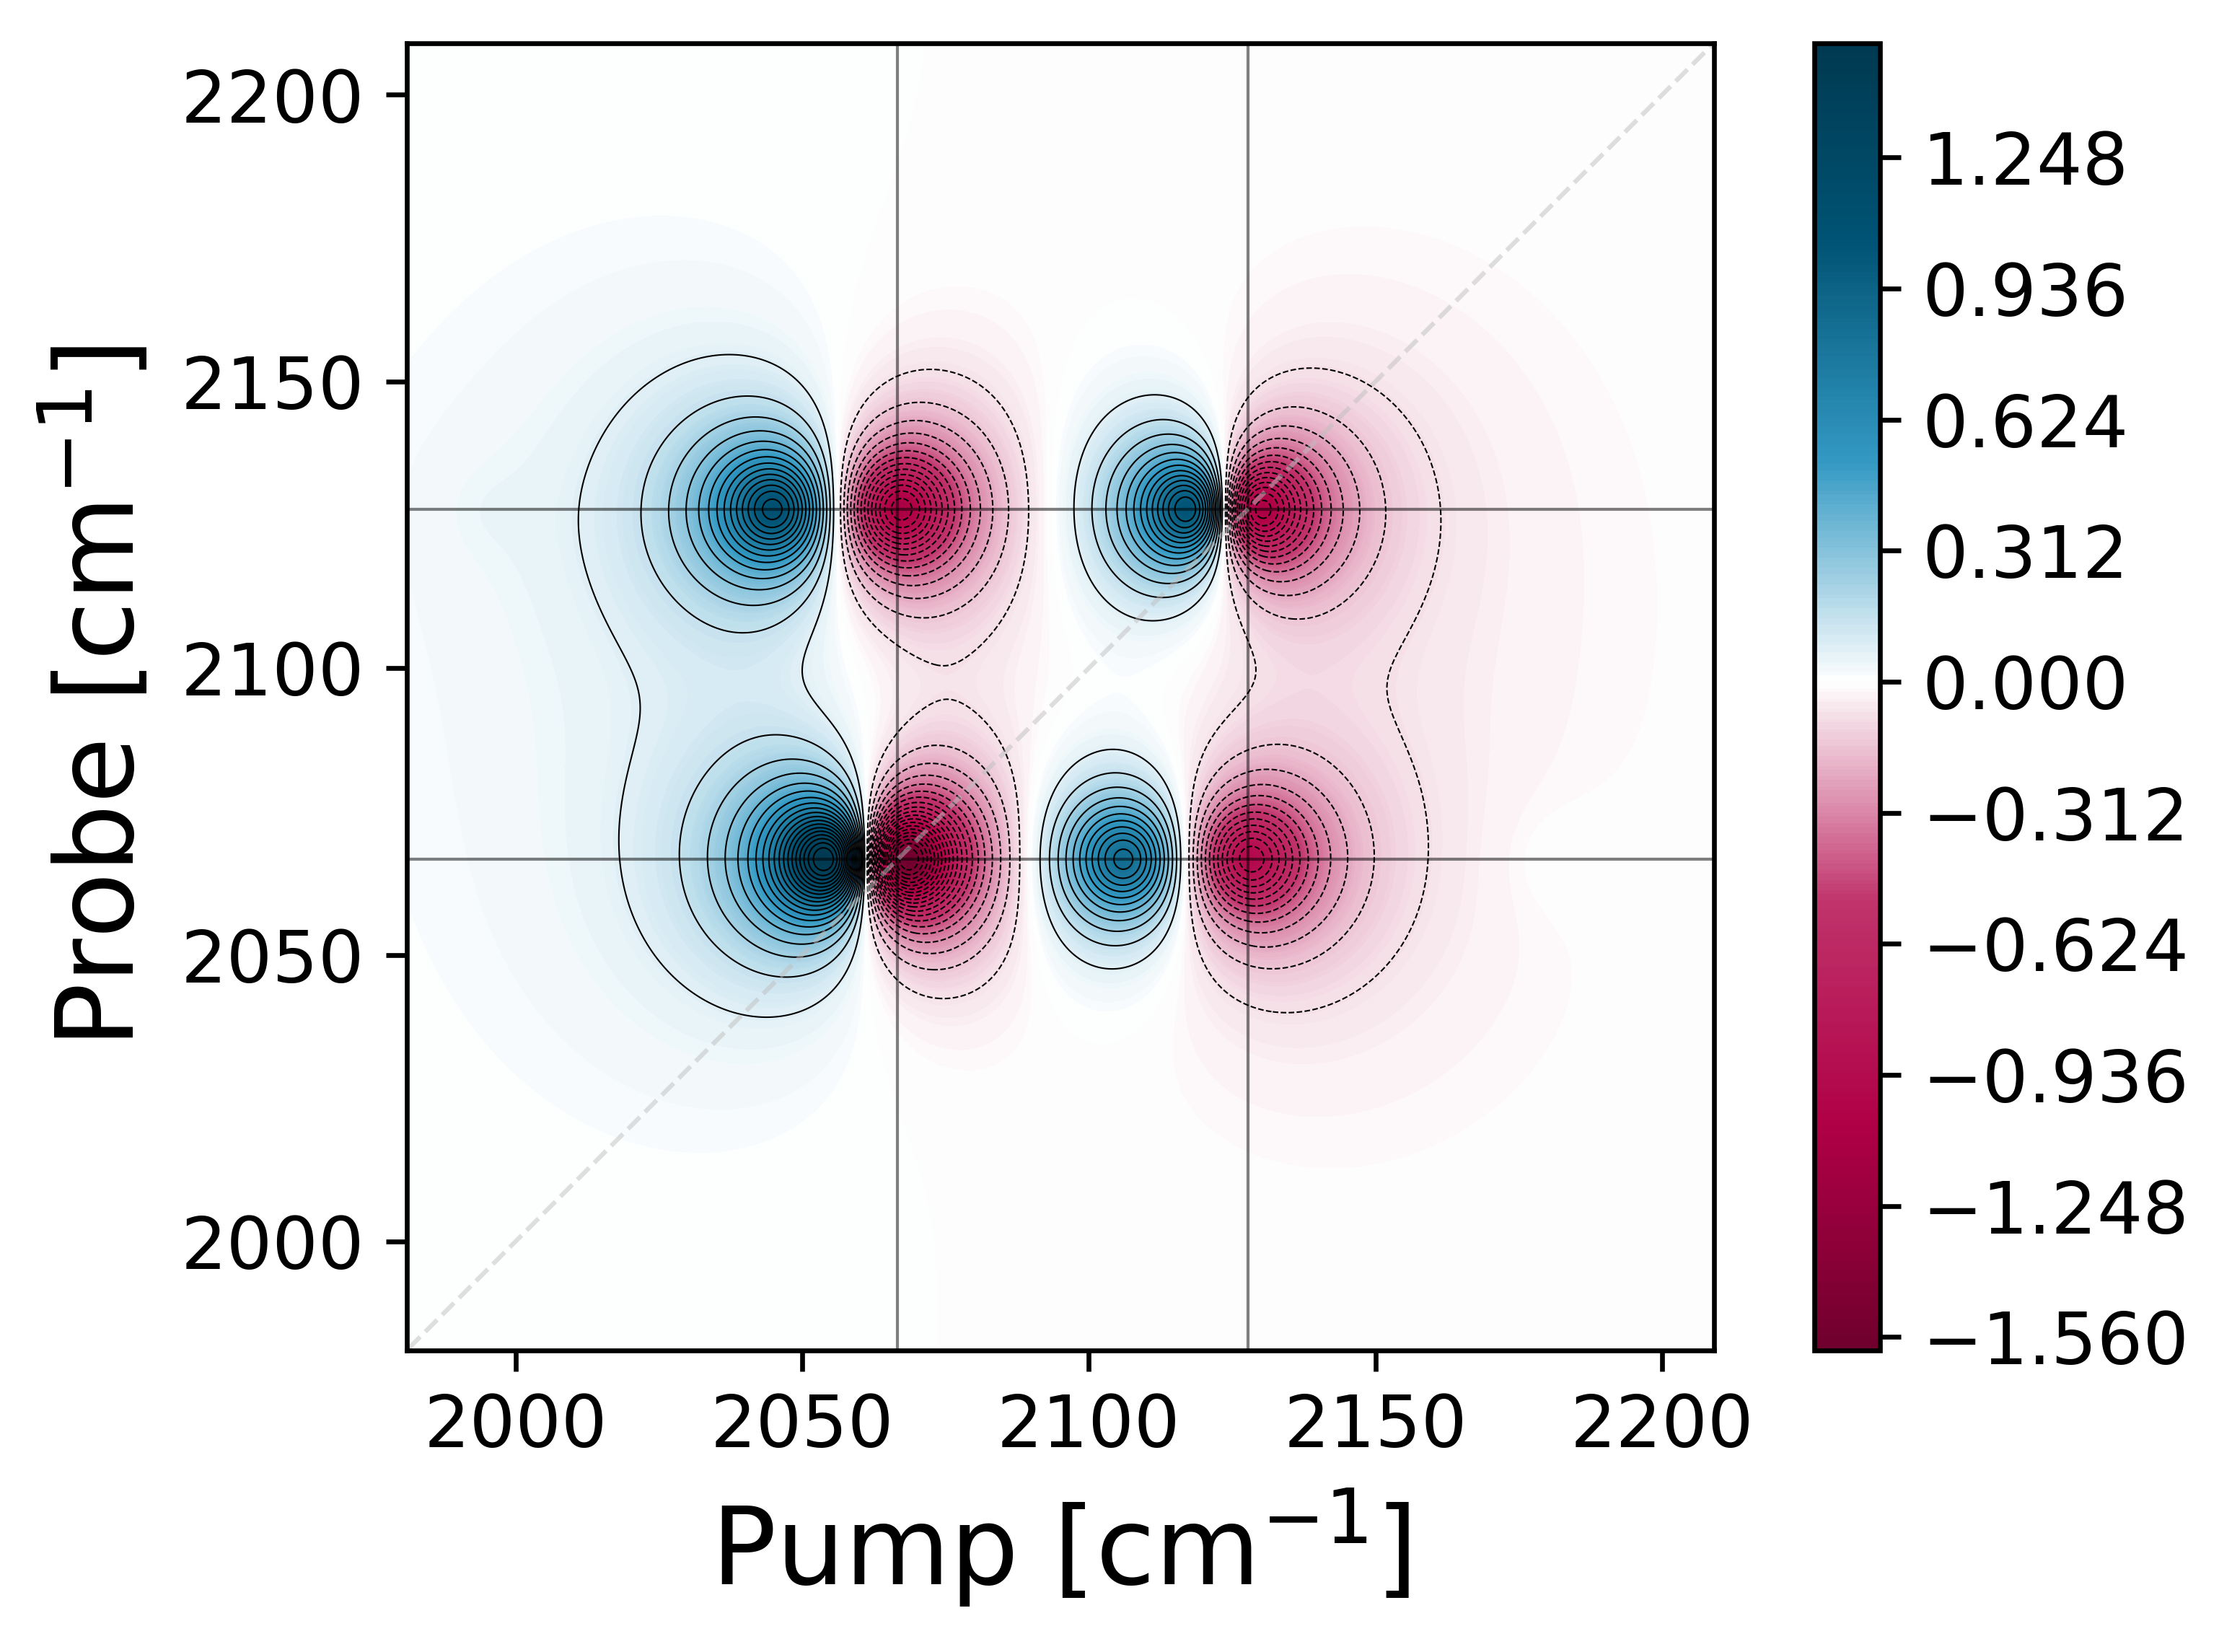

In [8]:
fig, ax = plt.subplots(dpi=600)

#plt.suptitle(mol,fontsize=lslarge)
#plt.title('"simple approach"',fontsize=8)

plt.vlines(ifreqs, usingmin, usingmax, colors='k', linewidth=.5, alpha=.5)
plt.hlines(ifreqs, usingmin, usingmax, colors='k', linewidth=.5, alpha=.5)
plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=.75, alpha=.5)

#plt.grid(True)
ax.set_aspect(1./ax.get_data_ratio())

if invertaxis:
    fig = plt.contourf(x,y,z.transpose(), 500, alpha=1, cmap=ccmap1, vmax=z_val, vmin=-z_val)
    #fig = plt.contourf(x,y,z.transpose(), 500, alpha=1, cmap=plt.cm.seismic_r, vmax=z_val, vmin=-z_val)
    CS = plt.contour(x,y,z.transpose(), spectrum().set_line_spacing(abs(z.max()),20),colors='k',linewidths=.25)
else:
    fig = plt.contourf(x,y,z, 500, alpha=1, cmap=plt.cm.seismic_r, vmax=z_val, vmin=-z_val)
    CS = plt.contour(x,y,z, spectrum().set_line_spacing(abs(z.max()),20),colors='k',linewidths=.25)

cbar = plt.colorbar(fig)
cbar.ax.tick_params(labelsize=lsmedium)
ax.tick_params(labelsize=lsmedium)
if invertaxis:
    plt.xlabel('Pump [cm$^{-1}$]', fontsize=lslarge)
    plt.ylabel('Probe [cm$^{-1}$]', fontsize=lslarge)
else:
    plt.xlabel('Probe [cm$^{-1}$]', fontsize=lslarge)
    plt.ylabel('Pump [cm$^{-1}$]', fontsize=lslarge)
plt.xlim(usingmin,usingmax)
plt.ylim(usingmin,usingmax)

#plt.plot(ble[0],ble[1], "x", color='gold', label='bleaching', markersize=10)
#plt.plot(exc[0],exc[1], "bx", label='excitation', markersize=5)
#plt.plot(emi[0],emi[1], "gx", label='stim. emiss.', markersize=5)

if saveplot:
    if invertaxis:
        plt.savefig('%s_anharm_lorentz_.png' %(mol),bbox_inches='tight')
    else:
        plt.savefig('%s_anharm_lorentz.png' %(mol),bbox_inches='tight')
#plt.savefig('%s_anharm_lorentz.png' %(mol),bbox_inches='tight')

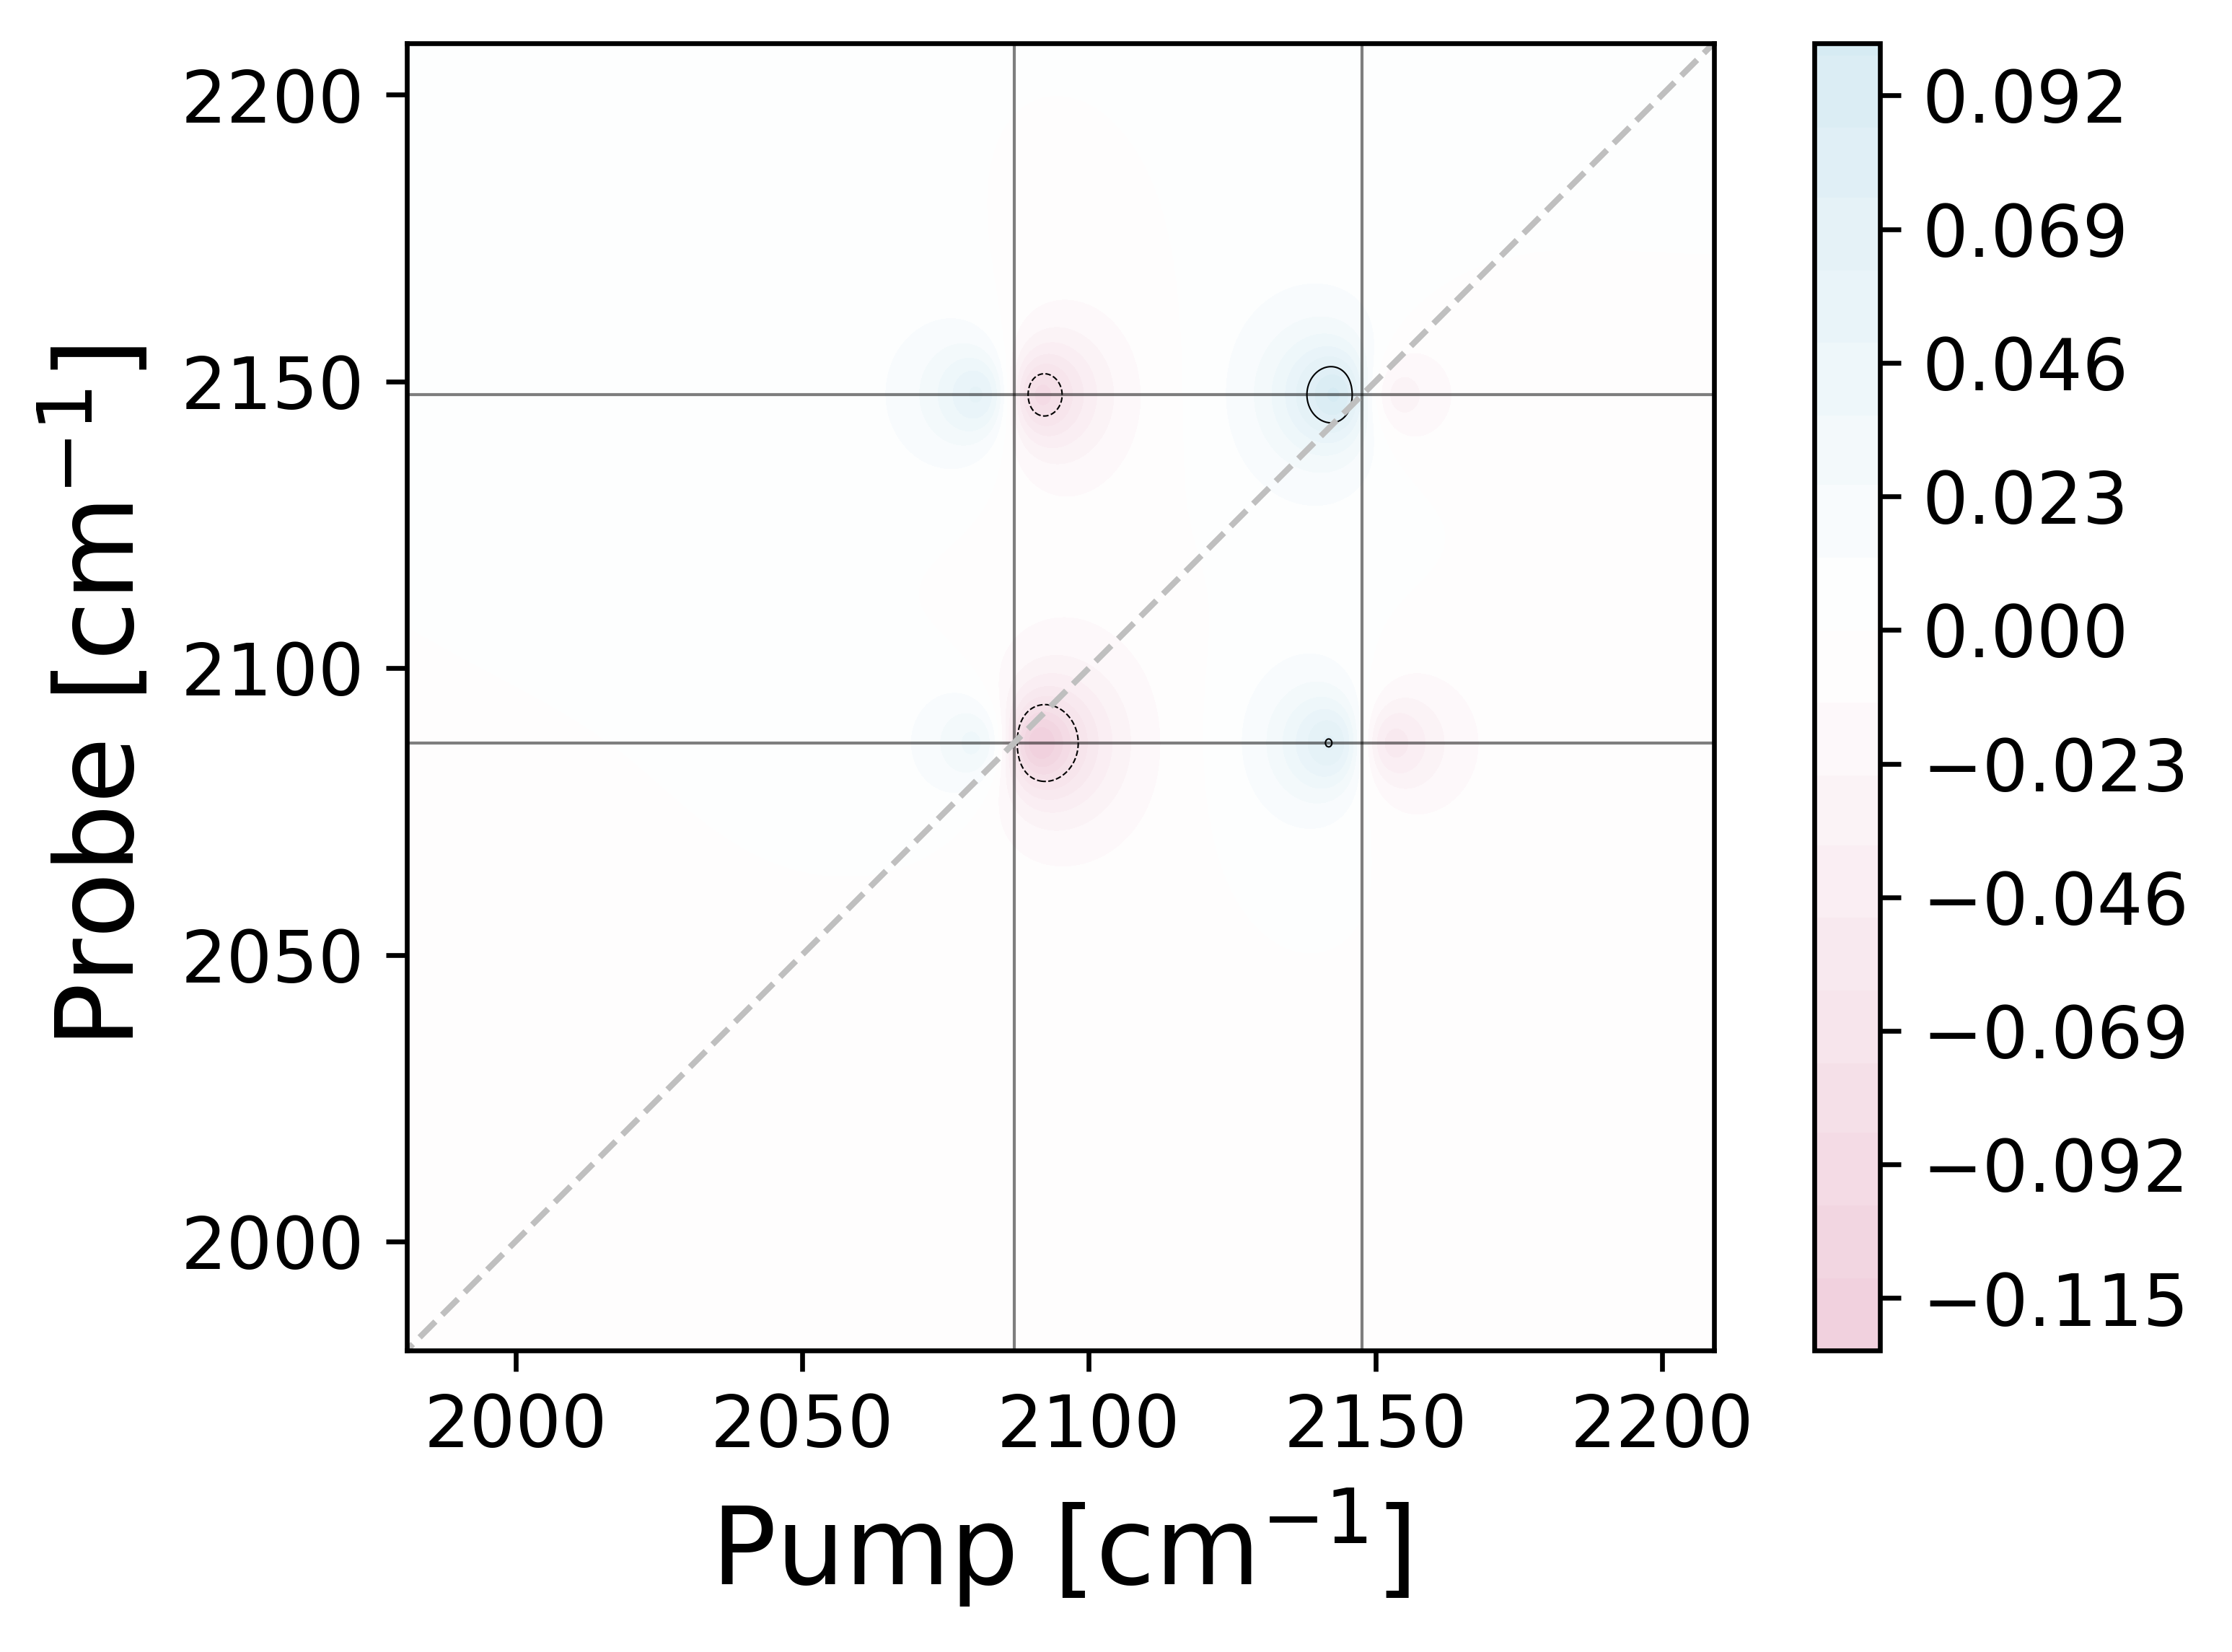

In [9]:
if harm:
    fig, ax = plt.subplots(dpi=600)

    #plt.suptitle(mol,fontsize=lslarge)
    #plt.title('"simple approach"',fontsize=8)
    
    plt.vlines(ifreqsh, usingmin, usingmax, colors='k', linewidth=.5, alpha=.5)
    plt.hlines(ifreqsh, usingmin, usingmax, colors='k', linewidth=.5, alpha=.5)
    plt.plot([0,newmax], [0,newmax], ls="--", c="0.75", linewidth=1)

    #plt.grid(True)
    ax.set_aspect(1./ax.get_data_ratio())

    if invertaxis:
        fig = plt.contourf(xh,yh,zh.transpose(), 500, alpha=1, cmap=ccmap1, vmax=z_val, vmin=-z_val)
        #fig = plt.contourf(xh,yh,zh.transpose(), 500, alpha=1, cmap=plt.cm.seismic_r, vmax=z_val, vmin=-z_val)
        CS = plt.contour(xh,yh,zh.transpose(), spectrum().set_line_spacing(abs(z.max()),20),colors='k',linewidths=.25)
    else:
        fig = plt.contourf(xh,yh,zh, 500, alpha=1, cmap=plt.cm.seismic_r, vmax=z_val, vmin=-z_val)
        CS = plt.contour(xh,yh,zh, spectrum().set_line_spacing(abs(z.max()),20),colors='k',linewidths=.25)

    cbar = plt.colorbar(fig)
    cbar.ax.tick_params(labelsize=lsmedium)
    ax.tick_params(labelsize=lsmedium)
    if invertaxis:
        plt.xlabel('Pump [cm$^{-1}$]', fontsize=lslarge)
        plt.ylabel('Probe [cm$^{-1}$]', fontsize=lslarge)
    else:
        plt.xlabel('Probe [cm$^{-1}$]', fontsize=lslarge)
        plt.ylabel('Pump [cm$^{-1}$]', fontsize=lslarge)
    plt.xlim(usingmin,usingmax)
    plt.ylim(usingmin,usingmax)

    #plt.plot(bleh[0],bleh[1], "x", color='gold', label='bleaching', markersize=10)
    #plt.plot(exch[0],exch[1], "bx", label='excitation', markersize=5)
    #plt.plot(emih[0],emih[1], "gx", label='stim. emiss.', markersize=5)

    if saveplot:
        if invertaxis:
            plt.savefig('%s_harm_lorentz_.png' %(mol),bbox_inches='tight')
        else:
            plt.savefig('%s_harm_lorentz.png' %(mol),bbox_inches='tight')